# Análise Exploratória de Dados

Este notebook realiza uma análise exploratória dos dados do projeto de previsão de churn bancário. As etapas incluem:

1. Carregamento e visualização inicial dos dados.
2. Análise estatística descritiva.
3. Visualização gráfica para identificar padrões e tendências nos dados.

# Etapa 1: Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Etapa 2: Leitura dos dados

In [ ]:
df = pd.read_csv("data/BankChurners_tratado.csv")
df['Attrition_Flag_Bin'] = df['Attrition_Flag'].map({"Attrited Customer": 1, "Existing Customer": 0})


[❌] Arquivo não encontrado: C:\Users\Iago\OneDrive\Desktop\Projeto Churn\data\BankChurners.csv


# Etapa 3: Análise da variável alvo

In [14]:
# Visualização inicial dos dados
try:
    if 'df' in globals():
        print("[ℹ️] Visualizando as primeiras linhas da base de dados...")
        display(df.head())
        print("[ℹ️] Estatísticas descritivas das variáveis numéricas...")
        display(df.describe())
    else:
        print("[❌] Variável 'df' não está definida. Certifique-se de que a célula de leitura dos dados foi executada com sucesso.")
except Exception as e:
    print(f"[❌] Erro ao visualizar os dados: {e}")
    raise

[❌] Variável 'df' não está definida. Certifique-se de que a célula de leitura dos dados foi executada com sucesso.


# Etapa 4: Correlação entre variáveis numéricas

C:\Users\Iago\AppData\Local\Temp\ipykernel_8756\4230826072.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


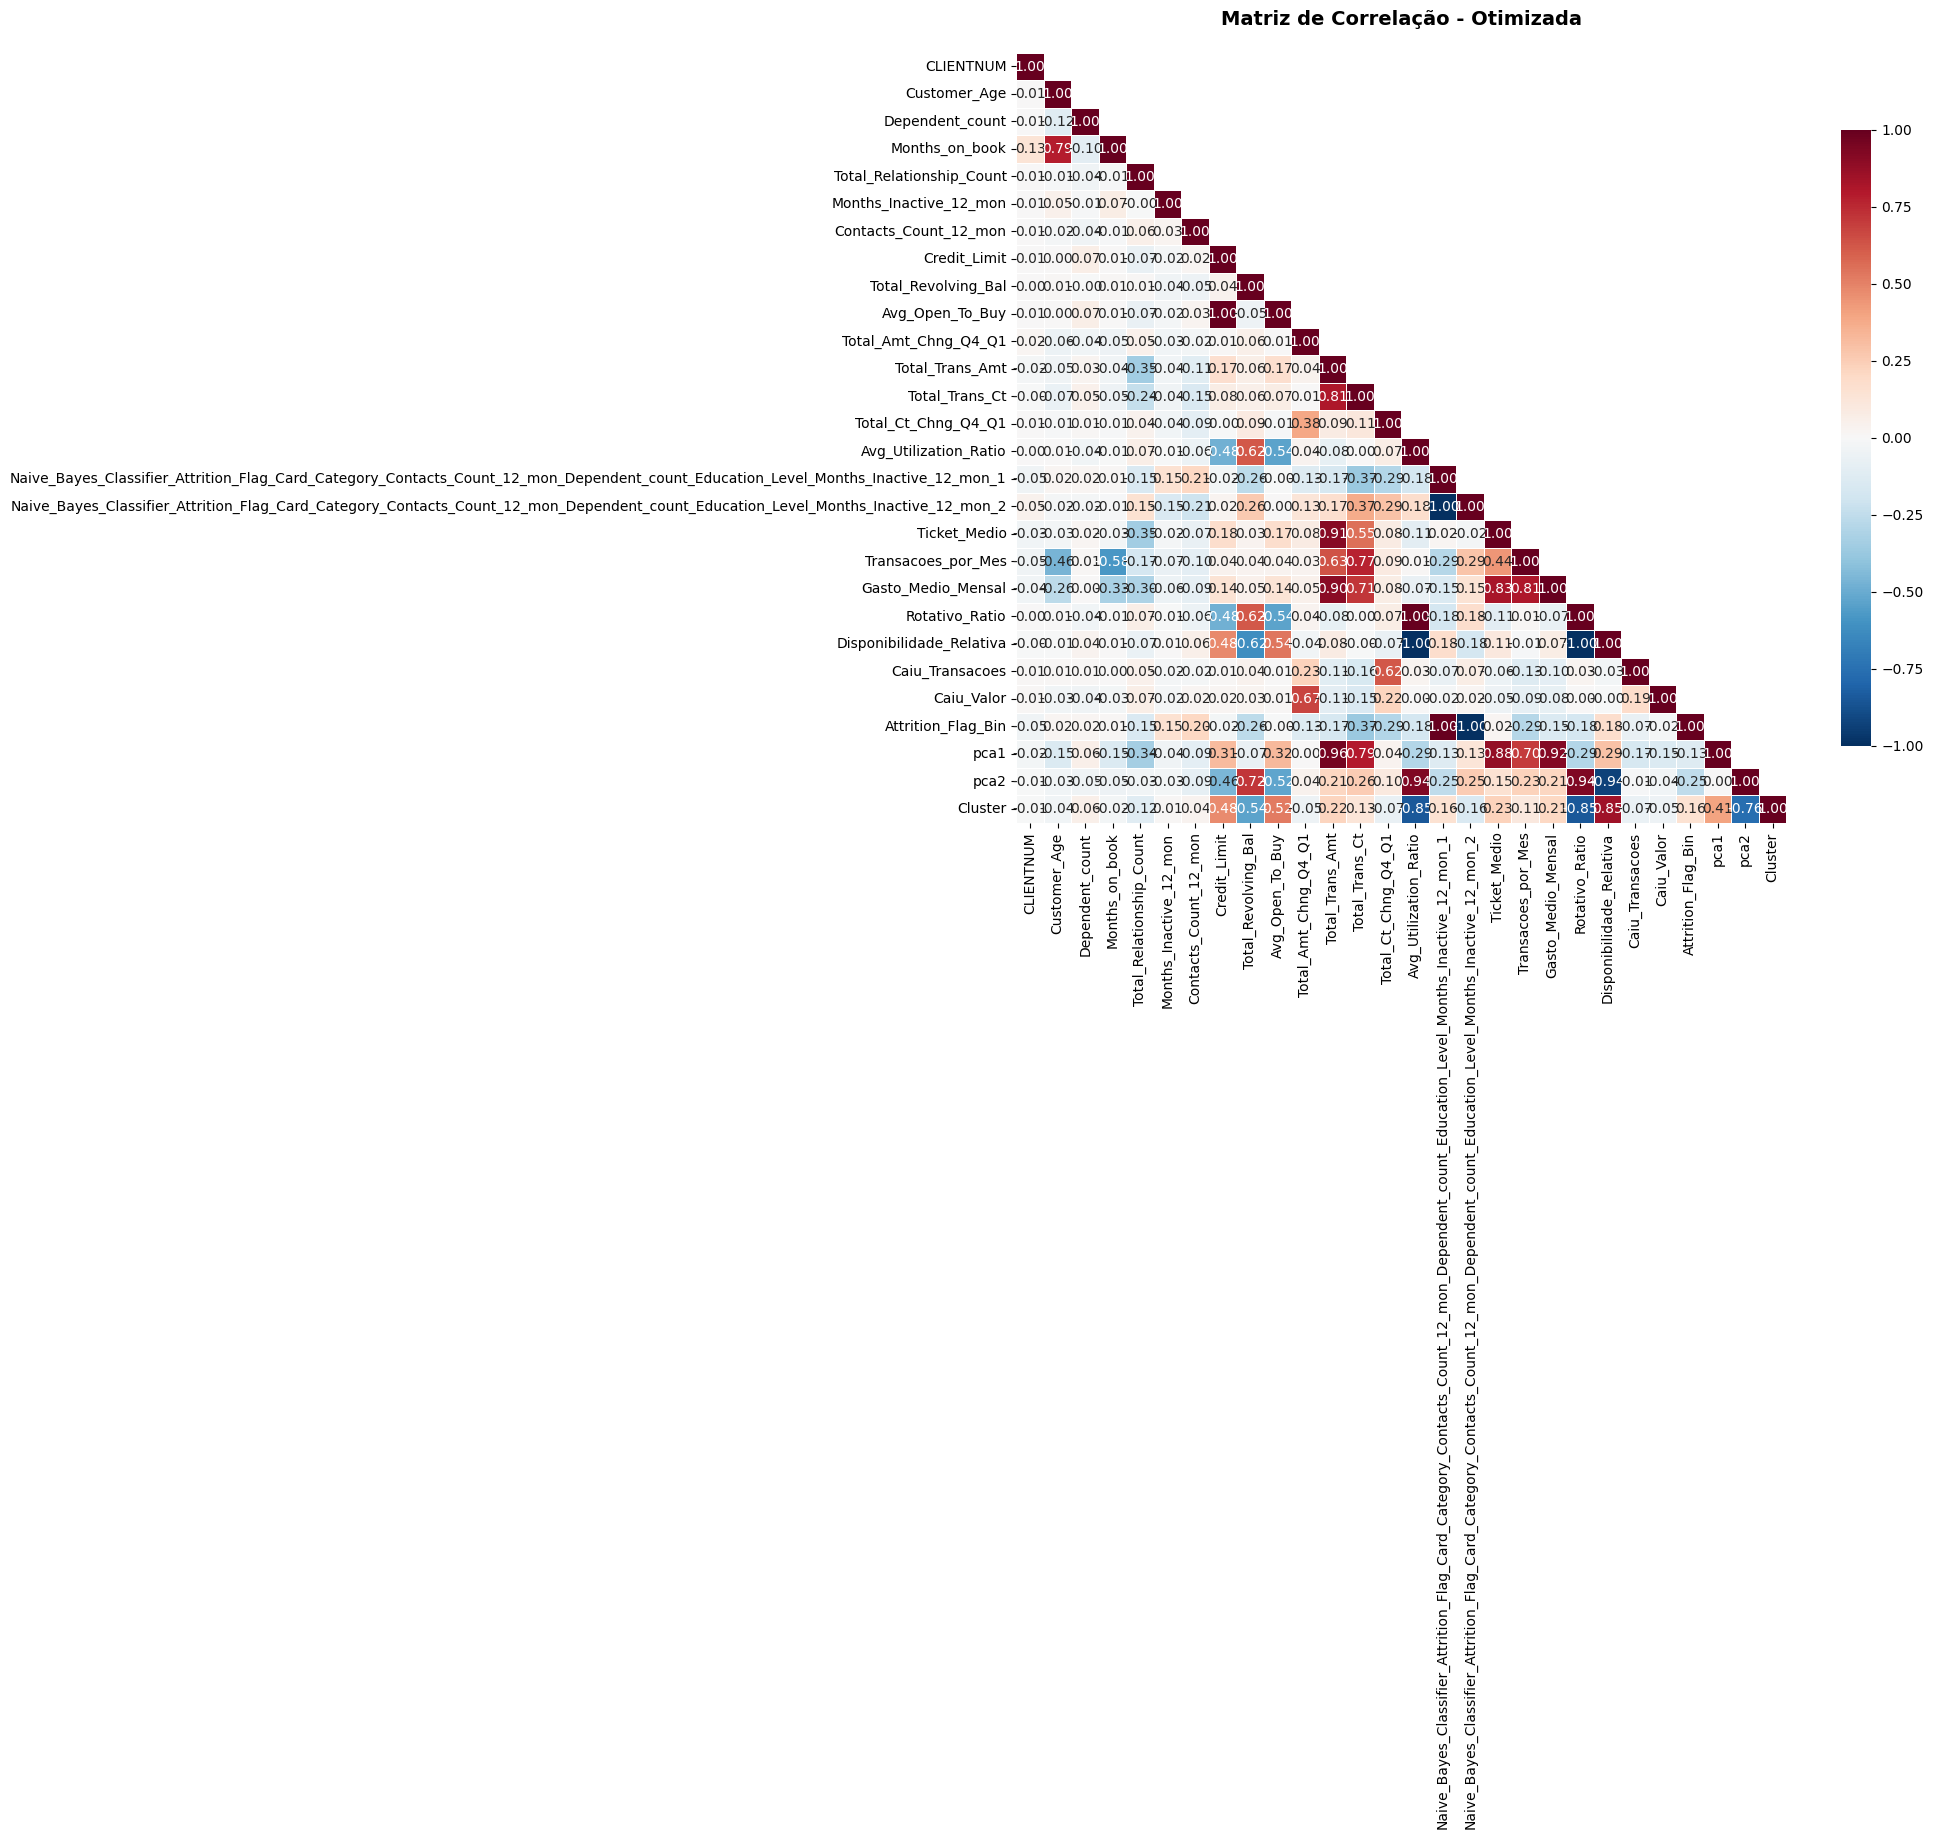

In [ ]:
# Análise gráfica: Distribuição de variáveis
try:
    print("[ℹ️] Gerando gráficos de distribuição...")
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Customer_Age'], kde=True, bins=20, color="blue")
    plt.title("Distribuição da Idade dos Clientes")
    plt.xlabel("Idade")
    plt.ylabel("Frequência")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='Attrition_Flag', data=df, palette="viridis")
    plt.title("Distribuição do Churn")
    plt.xlabel("Status do Cliente")
    plt.ylabel("Contagem")
    plt.show()
    print("[✔️] Gráficos gerados com sucesso.")
except Exception as e:
    print(f"[❌] Erro ao gerar gráficos: {e}")
    raise

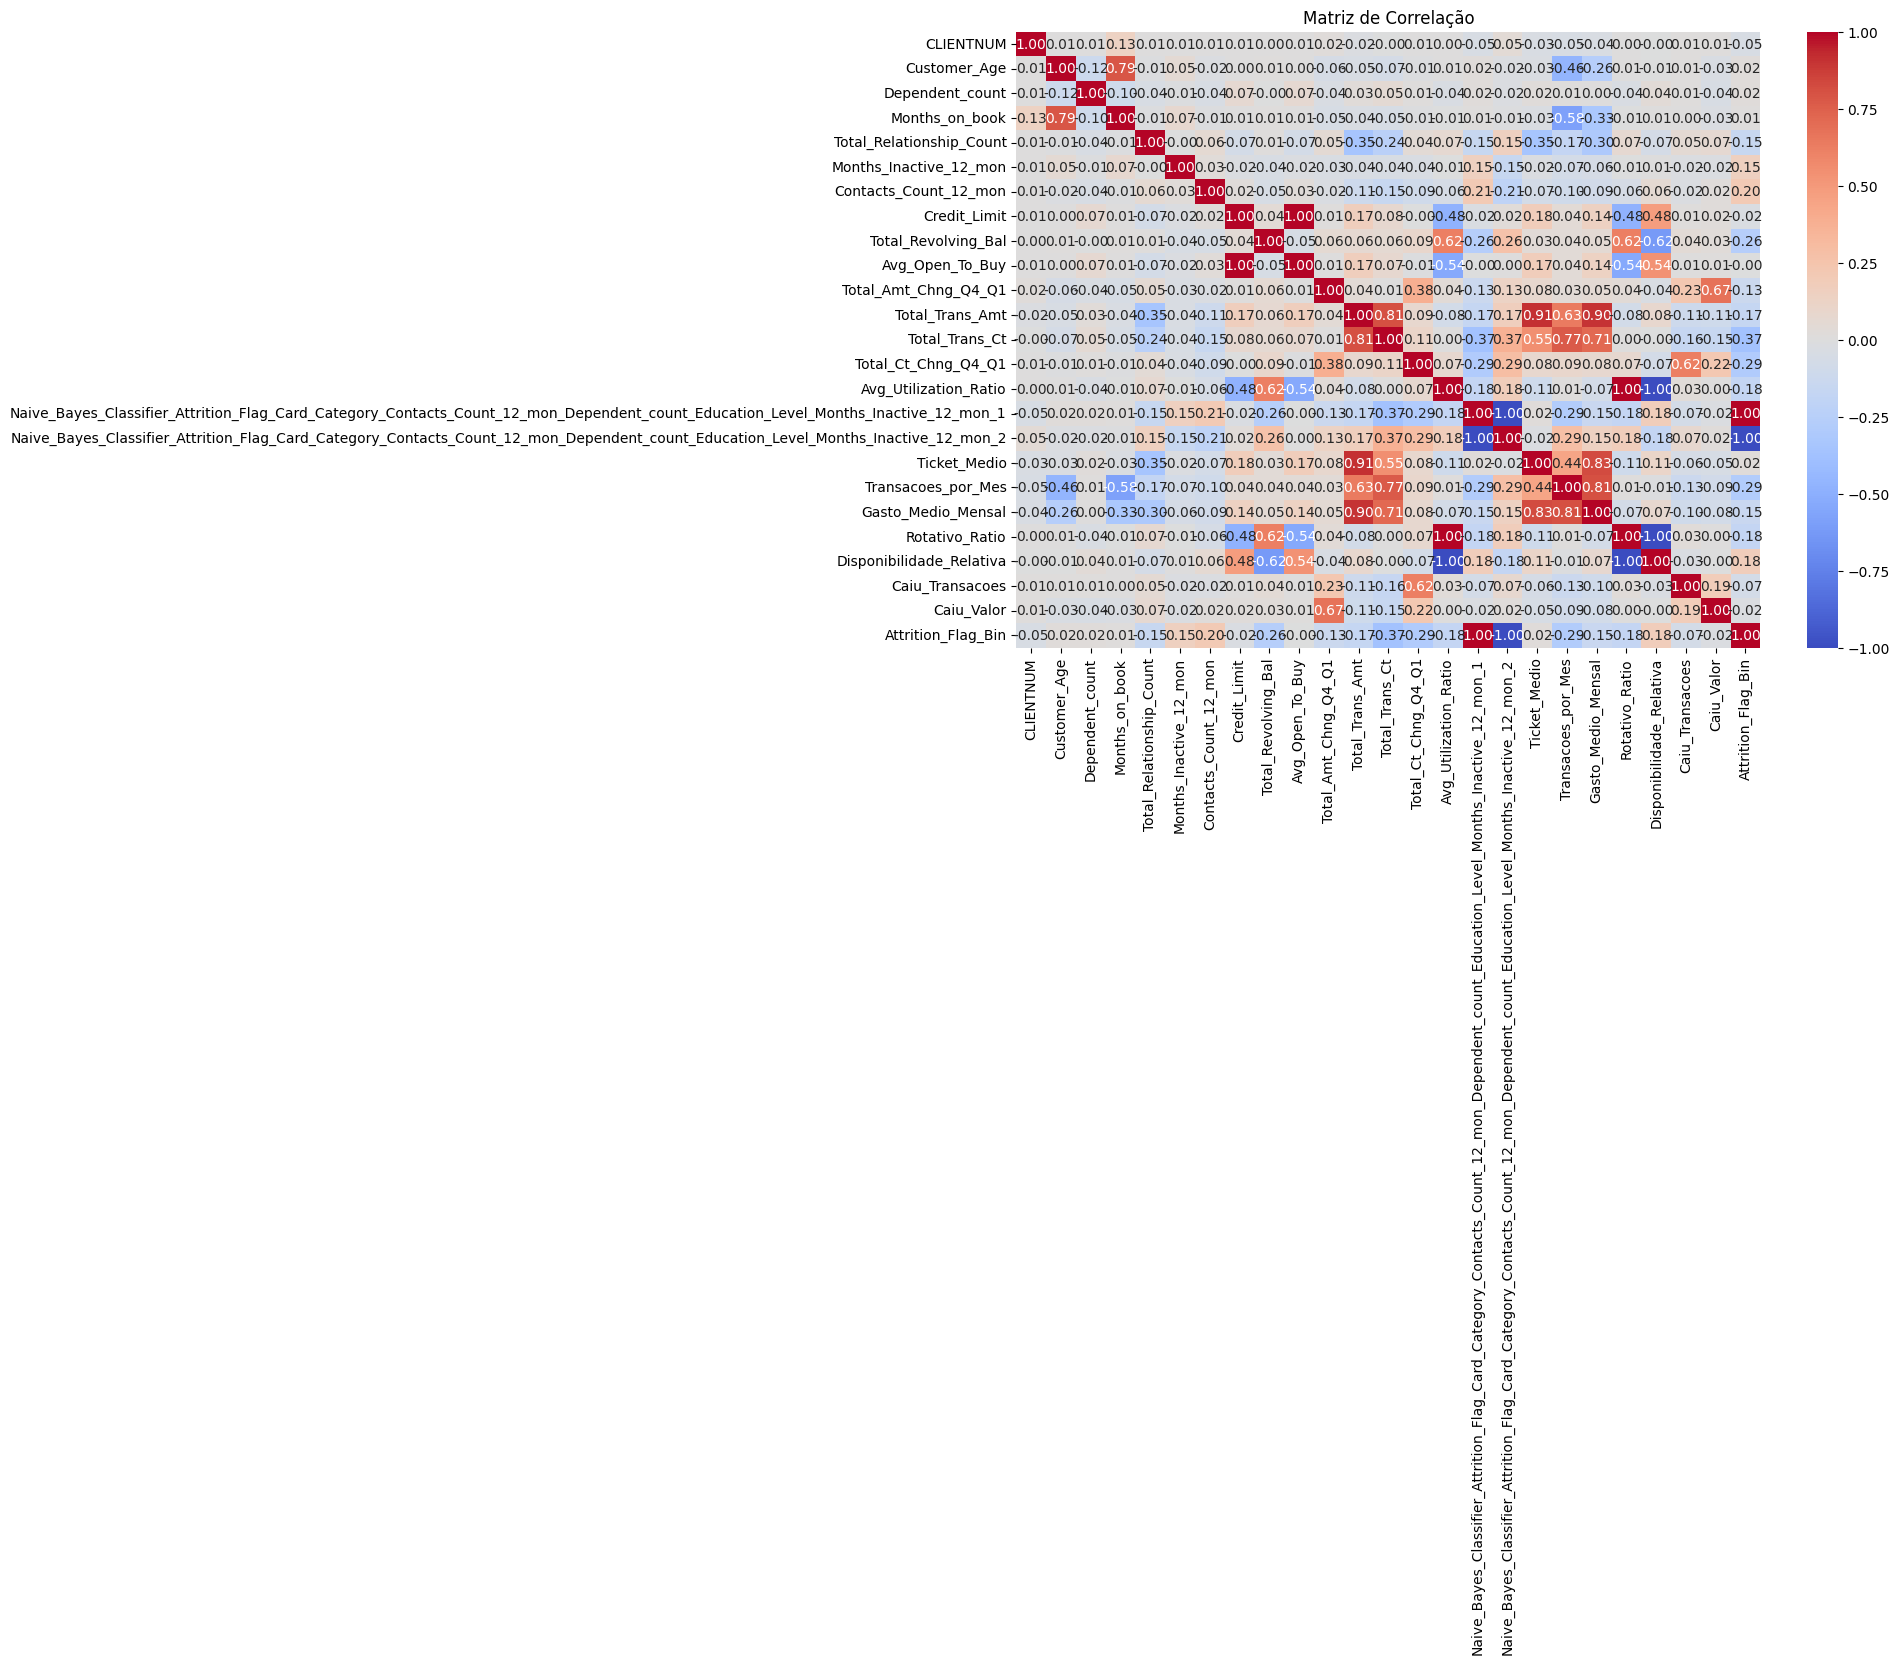

In [ ]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Etapa 5: PCA

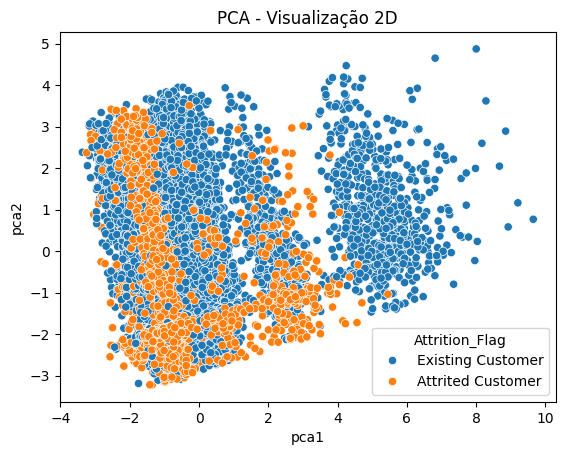

In [ ]:
variaveis = ['Customer_Age', 'Dependent_count', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct',
             'Ticket_Medio', 'Gasto_Medio_Mensal', 'Rotativo_Ratio', 'Total_Revolving_Bal',
             'Avg_Utilization_Ratio', 'Caiu_Valor', 'Caiu_Transacoes']

X = df[variaveis]
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1]
sns.scatterplot(data=df, x='pca1', y='pca2', hue='Attrition_Flag')
plt.title("PCA - Visualização 2D")
plt.show()

# Etapa 6: KMeans

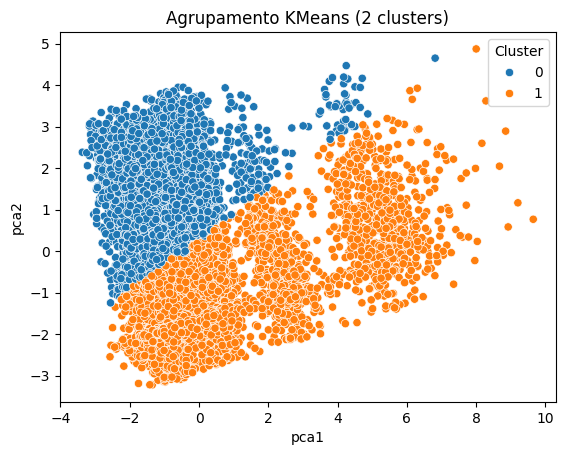

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_std)
df['Cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='pca1', y='pca2', hue='Cluster', palette='tab10')
plt.title("Agrupamento KMeans (2 clusters)")
plt.show()

# Etapa 7: Conclusão

In [ ]:
print("Resumo:\n- Classes estão desbalanceadas (16% churn).\n- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.\n- PCA e KMeans ajudam a visualizar agrupamentos.")


Resumo:
- Classes estão desbalanceadas (16% churn).
- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.
- PCA e KMeans ajudam a visualizar agrupamentos.
